# An overview of unsupervised learning

From a very high perspective unsupervised learning is about learning the density $p(\bx)$ on the basis of data $\bx_1,\ldots, \bx_n$. This is an overly ambitious task due to *curse of dimensionality* and often not directly addressing the reasons why we might want to employ unsupervised learning methods.

A much more vague but better description of unsuperivised learning is as the pursuit of **low-dimensional structure in high-dimensional data** without supervision, i.e., without explicit examples of what the low-d structure is. 

Operationally, often unsupervised learning methods associate low-d *latent variables* $\bz_i$ to each data point $\bx_i$ thus facilitating a *latent embedding* of the high-d data on a low-d latent space. "Structure" is related to this low-d latent space.

We will review algorithms that associate *continuous latent variables*. Such methods will allow us also to achieve dimension reduction - dim($\bx_i$) $\gg$ dim($\bz_i$) - which will be key for *data vizualization*. A central component of such algorithms is the **singular value decomposition**

We will also review algorithms that associate *discrete latent variables*. Effectively, such algorithms split the data in groups and often are the unsupervised counterpart of *classification*

## Summary

In this module we understand and put to practice decomposition of data, covariance, distance and affinity matrices. A key concept is the association of latent variables to rows and/or columns of the data matrix. We cover some classic multivariate stats concepts such as principal component analysis, multidimensional scaling and distance-based clustering, but also connect to interesting machine learning concepts such as autoencoders, matrix factorization and probabilistic inference. We illustrate the methods on very diverse applications.  

## Continuous latent variables

###  PCA 

We start with an algorithm for achieving continuous latent variable embeddings, the **singular value decomposition**. This is a decomposition of a *data matrix* $\bX$. To simplify matters we will assume that the data matrix has *centered* columns 

By data matrix think $n$ rows (the instances) and $p$ columns (the variables): $\bX$ 

#### Two synthetic examples
In order to do a little experimentation we will generate two synthetic data matrices. 

**Dataset-small**: $n=100$ replications of $p=2$ variables; this is a toy dataset for understanding concepts in an elementary way. In this example we can plot the data and this is helpful - and of course not an option in real problems!

**Dataset-large**: $n=100$ replications of $p=1000$ variables; this is realistic case of high-d data; we cannot plot so have to rely on real methods to extract information. 

The way we will simulate the data matrix is indicative of a type of low-d structure hidden in high-d data. Try to understand what the following code does

In [1]:
#loading relevant stuff
import numpy as np
import math

In [3]:
# dataset-small 
n = 100
Z_small = np.random.randn(n,1)
X1 = 2*Z_small+3
X2 = -Z_small+2
Xuncent = np.concatenate((X1,X2),axis=1)
Xuncent = Xuncent + 0.1*np.random.randn(n,2)
from sklearn.preprocessing import scale as scl
X_small = scl(Xuncent,with_std=False)

In [7]:
# dataset-large
n = 100
p = 1000
Z_large = np.random.randn(n,2)
L1 = 4*np.random.rand(2,30)-2 
X1 = np.matmul(Z_large,L1)
X2 = np.random.randn(n,(p-30))
Xuncent = np.concatenate((X1,X2),axis=1)
Xuncent = Xuncent + 0.05*np.random.randn(n,p)
from sklearn.preprocessing import scale as scl
X_large = scl(Xuncent,with_std=False)

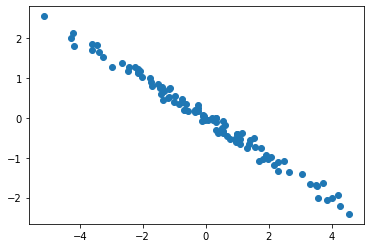

In [11]:
# Little coding project: 
# plot the 2-d dataset

from matplotlib import pyplot as plt
plt.scatter(X_small[:,0],X_small[:,1])


#### Fundamental question: one of coordinate systems

Lets rethink the basics! what are the data? Say in the 2-d example, an observation $\bx = (x,y)^T$ *registers* a datapoint in the Cartesian coordinate system 

<img src = "../images/Rotation_of_coordinates.png" width = "200">

The Cartesian coordinate system might be very little appropriate for registering the data, for example in the sense that it might use more dimensions than necessary, or in the sense that this coordinate system masks lower-d structure in the data. 

We can consider registration of data in different coordinate systems, i.e., do a *rotation of coordinates*. Can you see a different coordinate system in the dataset-small that could be more interesting? 

#### SVD (Singular Value Decomposition): a data-driven choice of coordinate rotation

Mathematically, it comes down to the following decomposition of the data matrix $\bX$


$$ \bX = \bU \bD \bV^T$$

where $\bU$ is $n \times n$ and $\bV$ is $p \times p$ are **orthogonal matrices** and $\bD$ is an $n \times p$ diagonal matrix. The columns of $\bU$ are called **left-singular vectors** and those of $\bV$ **right-singular vectors**

The elements of $\bD$ are called **singular values**:

$$D_{11} \geq D_{22} \geq \cdots \geq D_{pp} \geq 0 $$

All matrices are related to **eigenvalue decompositions** of column and row similarity matrices, $\bX^T \bX$ (column similarity) and $\bX \bX^T$ (row similarity)

$\bX^T \bX = \bV (\bD^T \bD) \bV^T$ (PCA - **principal component analysis**)

$\bX \bX^T = \bU (\bD \bD^T) \bU^T$  

If we are given one of the three decompositions, we can recover the other two - they are all directly related. SVD (or PCA or the other decomposition) can be efficiently obtained in either of the two *big data* limits: large $n$ and small $p$ OR small $n$ and large $p$

The columns of $V$ define *a new coordinate system*; a rotation of the original Cartesian coordinate system. The coordinates of the original data points $\bx_i$ in this new coordinate system are 

$$(D_{11} U_{i,1},D_{22} U_{i,2},\ldots,D_{pp} U_{i,p})^T$$

In [12]:
# SVD for the small synthetic example 
Us, Ds, Vt = np.linalg.svd(X_small) #s for small, t for transpose!
Vs = Vt.transpose()
# print the new coordinate vectors:
print(Vs)
print(Ds)

[[ 0.89528335  0.44549717]
 [-0.44549717  0.89528335]]
[23.88021623  1.03307978]


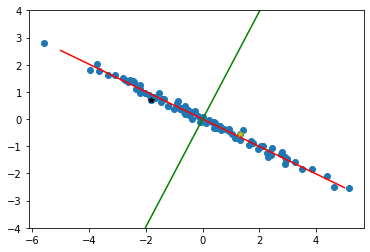

In [ ]:
# Lets plot the 2-d data and superimpose the new axes:
fig = plt.figure()
plt.scatter(X_small[:,0],X_small[:,1],)
xx = np.linspace(-5,5,10)
beta1 = Vs[1,0]/Vs[0,0]
beta2 = Vs[1,1]/Vs[0,1]
plt.plot(xx,beta1*xx,"r")#the 1st axis (largest singular value)
plt.plot(xx,beta2*xx,"g")#the 2nd axis (second largest singular value)
plt.plot(X_small[15,0],X_small[15,1],"k*")#highlighting a point
plt.plot(X_small[35,0],X_small[35,1],"y*")#highlighting a point
plt.ylim(-4,4)
plt.show()

The red line is **not** a regression line! It is the axis identified by the data itself. 

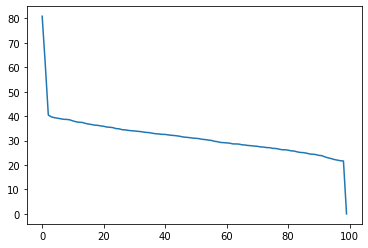

In [ ]:
# SVD for the large synthetic example 
Ul, Dl, Vt = np.linalg.svd(X_large)
Vl = Vt.transpose()
# print the new coordinate vectors:
plt.plot(Dl)

#### Dimension reduction  - compression - encoding

Consider the dataset-small toy example. If we register the data in the new data-chosen coordinate system, the 2nd axis "adds very little to tell the data apart", their essential differences are captured by their coordinates in the first axis. 

Therefore, if we wanted to reduce their dimension from 2 to 1, we could represent each data point $i$ by their value on the first axis, i.e., associate a **latent coordinate** 

$$z_i = D_{11} U_{i,1}$$ 

Lets do precisely this for the dataset-small (be prepared that signs might be different from what you imagine, but internally consistent!)

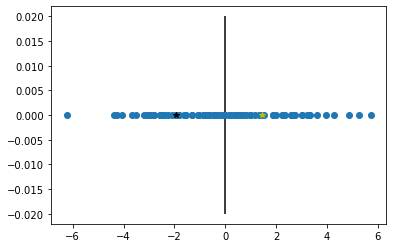

In [ ]:
fig = plt.figure()
plt.plot(Ds[0]*Us[:,0],np.zeros(n),"o")
plt.plot(Ds[0]*Us[15,0],0,"k*")#highlighting a point
plt.plot(Ds[0]*Us[35,0],0,"y*")#highlighting a point
plt.vlines(0,-0.02,0.02)
plt.show()

More generally, for $p$-dimensional data, we can associate a **low-dimensional latent coordinate** $\bz_i$ of dimension $r<p$ to the $i$th data point $\bx_i$, as:

$$\bz_i^T = \bU_{i,1:r} \bD_{1:r,1:r}$$

These are the $i$th data point's coordinates in the data-chosen coordinate system defined by the first $r$ right-singular vectors. I can now work with the latent coordinates instead and form the **reduced-dimension** dataset 

$$\underbrace{\bZ}_{n \times r} = \left (\begin{array}{c} \bz_1^T \\ \bz_2^T \\ \cdots \\\bz_n^T\end{array} \right)$$

Basic linear algebra shows that precisely: 

$$\underbrace{\bZ}_{n \times r} = \underbrace{\bU_{\cdot,1:r}}_{n \times r} \underbrace{\bD_{1:r,1:r}}_{r \times r}$$

$r$ is the dimension of the **latent space**

We can think of the mapping $\bX \rightarrow \bZ$ as **compression** - or alternatively (a point of view we will revisit) as **encoding**.  


In this example, the data have actually been generated by a low-d signal! Lets see to what extent the extracted latent variables look like the ones we used in our synthetic example. 

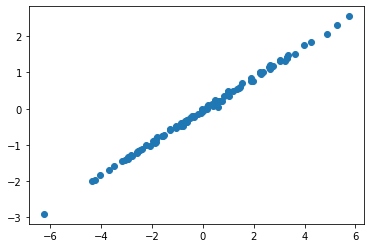

In [ ]:
# Little coding project: 
# plot the latent variables vs the signal variable 
# in the dataset-small example

plt.scatter(Ds[0]*Us[:,0],Z_small)

Lets first exctract these quantities for our synthetic data and plot them, for $r=2$. We take advantage of the fact that we have synthetic data and compare the extracted latent variables with the 2-d vectors that were used to simulate the data

#### Exercise
Extract latent variables and form the latent variable data matrix Z for the dataset-large with r=2.
Plot the latent variables vs the signal variables 
It is convenient to turn matrices into dataframe, and plot in pairs (use *sns.pairplot()* )to create simultaneously the plot of the two extracted latent vectors vs the two signal variables.

WARNING: this is mainly a little project on graphs and less on SVD!

In [13]:
# Your code here 
# Use np.matmul() for matrix multiplication.

#### Decompression - decoding

We can try to reconstruct the original data matric $\bX$, which means try to represent each data point on the original system. This is simply done by multiplying the latent coordinates with the axes that define the new system, i.e., we simply take: 

$$\btX = \bZ \,\, (\bV_{\cdot,1:r})^T = \bU_{\cdot,1:r} \bD_{1:r,1:r} (\bV_{\cdot,1:r})^T$$

In particular, each reconstructed data point is: 

$$\widetilde{\bx}_i = \bV_{\cdot,1:r} \, \bz_i$$

Notice that when $r=p$ we obtain a perfect reconstruction, $\btX = \bX$

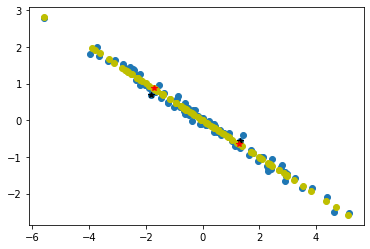

In [ ]:
# Lets do the reconstruction for the dataset-small
tX_small = np.matmul(np.reshape(Ds[0]*Us[:,0],(n,1)),np.reshape(Vs[:,0],(1,2)))
plt.figure()
plt.scatter(X_small[:,0],X_small[:,1])
plt.scatter(tX_small[:,0],tX_small[:,1],c="y")
plt.plot(X_small[15,0],X_small[15,1],"k*")#highlighting a point
plt.plot(X_small[35,0],X_small[35,1],"k*")#highlighting a point
plt.plot(tX_small[15,0],tX_small[15,1],"r*")#highlighting a point
plt.plot(tX_small[35,0],tX_small[35,1],"r*")#highlighting a point
plt.show()

We can think of the mapping $\bZ \rightarrow \btX$ as **decompression** or **decoding**

A little linear algebra shows that what we have done so far is: 
+ Encode: $\bX \rightarrow \bX \,\bV_{\cdot,1:r} = \bZ$
+ Decode: $\bZ \rightarrow \bZ  (\bV_{\cdot,1:r})^T = \btX$ 

#### Principle components, factors and all that jazz!

The terminology I prefer here is $\bz_i$ as latent variables - or latent coordinates, in the sense of being the coordinates of original data in a latent space. 

However, you will find an abundance of terminology, this might help to put into perspective:

 + $\bz_i$ are also called factors, or latent factors, but sometimes (confusingly) also principal components
 + $\bV_{\cdot,1:r}$ is called the loadings matrix - it shows how original variables load on the factors  due to $\widetilde{\bx}_i = \bV_{\cdot,1:r} \, \bz_i$

#### Some optimality properties

+ **Explained variance**: The first $r$ columns of $\bV$ are orthogonal vectors in $p$-dim space. The first column is the direction along which the *data vary maximally*, the second is the direction of maximal variance orthogonal to the first, etc. For each data point $\bx_i$, the associated latent variables $\bz_i$, are the coordinates in this new system. To get an indication of this we plot the variance of the latent factors vs their index

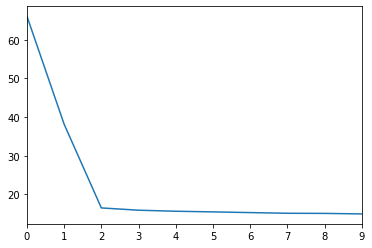

In [ ]:
Zlext_more = np.matmul(Ul[:,0:10],np.diag(Dl[0:10]))
df = pd.DataFrame(Zlext_more)
df.var().plot()

+ **Optimal low-rank approximation** Some (feasible!) math shows that 
$$\|\bX - \btX\| \leq \|\bX - \bB\|$$ among all rank-$r$ matrices $\bB$, both in terms of the Frobenius and the spectral norm. Lets look at how this error decays with $r$ for our synthetic example: 

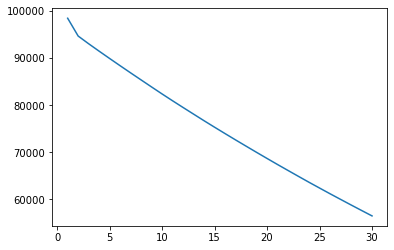

In [ ]:
rmax = 31
errors = np.zeros(rmax-1)
r = range(1,rmax)
for i in r:
    Zext_temp = np.matmul(Ul[:,0:i],np.diag(Dl[0:i]))
    Xapprox = np.matmul(Zext_temp,np.transpose(Vl[:,0:i]))
    resid = X_large-Xapprox
    residsq = np.matmul(resid.transpose(),resid)
    errors[i-1] = residsq.trace()
plt.plot(r,errors)

#### SVD/PCA as a linear autonencoder

We can relate the method we have been studying to one of the most fundamental **neural networks**, the autoencoder

<img src = "../images/autoencoder.png" width = "400">

Some math shows that the following optimization problem, that involves finding an encoding and decoding matrices: 

$$\min \|\bA \bX \bB - \bX\|$$ 

is precisely solved by PCA 

#### Probabilistic PCA 

This is a statistical model - not an algorithm - for unsupervised learning that involves latent variables: 

$$\underbrace{\bx_i}_{p \times 1} \sim \Gau(\underbrace{\bW}_{p \times r} \,\, \underbrace{\bz_i}_{r \times 1}, v\bI) \quad \bz_i \sim \Gau(\bO,\bI)$$

It is known that the **maximum likelihood estimator (MLE)** of $\bW$ can be obtained via the SVD, hence PCA can be seen as an algorithm that returns the MLE of a specific statistical model. This connection leads to a few important possibilities:
 + Understand better how to interpret the output and implicit assumptions in PCA
 + Extend the model in various ways (we will discuss a few important ones) 
 + Obtain the MLE using alternative methods to SVD, e.g. the **EM algorithm**. This works both ways: we can do SVD using the EM, and this can be very interesting for certain big data applications. Also learn $r$ using a variety of statistical tools
 
 Note that pPCA is a linear regression model for $\bW$ for given latent factors $\bz_i$, and a linear regression model for $\bz_i$ for given $\bW$

#### Factor analysis


$$\bx_i \sim \Gau(\bmu + \bW \bz_i, diag(\bv)) \quad \bz_i \sim \Gau(\bO,\bI)$$

This is one of the natural extensions of pPCA to allow heteroscedasticity - and this is important in practice, especially when highly volatile variables are uncorrelated with the rest

#### Independent component analysis

$$\bx_i \sim \Gau(\bmu + \bW \bz_i, diag(\bv)) \quad \bz_i \sim \textrm{non-Gaussian distribution}$$

typically non-Gaussian is a *mixture of Gaussians* (a concept we will return to in *discrete latent variables*)

This is the method of choice for many areas of Science for basic unsupervised learning. Also has strong links to a current theme in Machine Learning, **variational autoencoders** and **disentangled representations**

#### Applications/motivations for the above framework to unsupervised learning, and some terminology


Applications/uses:
 + Explain correlations between many variables in terms of few common factors
 + Realistic estimation of large covariance matrices when $p$ is large (low-rank assumption)
 + Deconvolution: the observed data $\bx_i$ is a convolution of signals $\bz_i$ (<a href='https://en.wikipedia.org/wiki/Cocktail_party_effect'>cocktail party problem </a> - typically using independent component analysis)
 + Psychometrics: $\bz_i$ are latent skills, $\bx_i$ are tests; in this case $\bW$ shows what skills each test relates to 
 + Image analysis: $\bx_i$ are pixelized images, $\bW$ are image features and $\bz_i$ shows how each image is composed by these features
 


#### An example: pattern recognition

This and the figures are taken from the Tibshirani et al. book Elements of Statistical Learning (Chapter 14)

$\bX$ is a matrix of hand-written digits, of size $658\times 256$, a subset of which is shown here (note the convenient visuzalization of this high-d dataset exploiting the spatial nature of the data)

 <img src="../images/MNIST1.png" width="600">
 
Notice the **variation** in the data due to a number of **components**: thickness, orientation, vertical elongation, horizontal elongation, caligraphy, etc

We run PCA with $r=2$. The following figure plots the factors $\bz_i$ for each of 658 data points, and highlights the data points close to certain quantiles of the empirical distribution of each factor. What aspects of the hand-written variation does each of the latent variables corresponds to? How could you verify that your intuition is right? What further visualization could you try here? 

 <img src="../images/MNIST2.png" width="600">

In such application PCA can be used both for **data compression**, since for each image a relative small number of latent variables might be able to provide satisfactory reconstruction, and for **understanding the sources of variation** and their relative importance

### Matrix factorization

Here is a more creative way to think what we have been doing so far. We have worked with data matrices $\bX$ which we think of individuals vs variables. Lets have a few more concrete cases of $\bX$ to build a better intuition, e.g.
  + customers - products in online retailer ($X_{ij}$ is a rating)
  + people - photos ($X_{ij}$ is $j$-th pixel intensity)
  + documents - terms ($X_{ij}$ is the number of times $j$th term is used)
  
One of interpretations of what we achieved with PCA is to approximate $\bX$ by a matrix product, $\bZ \bW^T$ where the rows of $\bZ$ are $r$-dim latent variables associated to each $i$; the rows of $\bW$ are also $r$-dim and we have one for each $j$; lets denote those by $\bw_j$; we can also think of those as continuous latent variables associated with the columns of the data matrix $\bX$

Hence, from this perspective we have **embedded on a latent space** the customers/documents/people AND the products/terms/photos and explain $X_{ij}$ by a measure of **affinity** between the corresponding latent variables:

$$X_{ij}  \sim g(\bz_i,\bw_j)$$

The measure we used in PCA and related approaches relates to the covariance of the latent vectors, $\bz_i^T \bw_j$ 

In the context of **text mining** this approach is known as **latent semantic analysis**

One variant of this idea is **non-negative matrix factorization** where $\bx_i,\bz_i,\bw_j$ are non-negative. This is typically formulated as 

$$X_{ij} \sim Poisson(e^{\bz_i^T \bw_j})$$ 

and estimation of $\bZ,\bW$ by exploiting the bilinear nature of the objective function and algorithms for maximizing *generalized linear model* likelihoods

 <img src="../images/NMF.png" width="800">
 


### Multidimensional scaling (MDS)

This is an approach to latent low-d embeddings of high-d data that associates latent variables to the rows of the data matrix $\bX$. The aim here is that the distances $d(\bx_i,\bx_j)$ among the high-d data are preserved to good extent in the latent embedding, i.e., $$d(\bx_i,\bx_j) \approx d(\bz_i,\bz_j)$$ for $d(\cdot,\dot)$ a metric. This technique is an important tool in **data visualization** hence typically the latent dimension is taken to be $r=2$ or $r=3$.



#### Classical scaling

Classical MDS is the solution to the following optimization problem: find latent embeddings $\bz_i$ such that the sample covariances among original data points are as close as possible to those among latent points, i.e., 

$$\min_{\{\bz_i\}} \sum_{i,j} \left( (\bx_i - \bxbar)^T(\bx_j - \bxbar) - (\bz_i - \bzbar)^T(\bz_j - \bzbar) \right)^2 $$

It might not be immediatelly obvious but little math (analogous to that for optimality of PCA) can reveal that:
  + This problem is equivalent to 
  $$\min_{\{\bz_i\}} \sum_{i,j} \left( \|\bx_i - \bx_j\|^2 - \|\bz_i - \bz_j\|^2\right)^2 $$
  for $\|\cdot\|$ the Euclidean metric
  + This problem is equivalent to PCA. We need to obtain the SVD of the centered data matrix $\bX$, and then take $\bZ = \bU \bD_r$  - but it is not needed to obtain the $\bW$ matrix in this case. The connection is established by noting that the objective function based on covariances is effectively a Frobenius norm. This is in accordance with our earlier observation that MDS only embeds the rows of the data matrix. The problem admits a unique solution.
  
#### MDS

Is defined as the solution to the optimization problem

$$\min_{\{\bz_i\}} \sum_{i,j} \left( d(\bx_i , \bx_j) - d(\bz_i ,\bz_j)\right)^2 $$

Note that with the Euclidean distance $d(\bx_i,\bx_j) = \|\bx_i - \bx_j\|$ we obtain something that looks like classical scaling, but with the important difference that the latter uses squared distances. MDS with this metric does not admit an explicit solution. Generally, gradient descent is used to find local minimum. 

The metric should be used according to the application and data at hand; can you think reasons NOT to use the Euclidean?


#### Exercise:  A small project on classical scaling

The following toy dataset is taken by Greenacre, "Biplots in practice". It is stored as a CSV file in countries_pref.csv - but the essense of this data goes back long way, e.g. Kaufman and Rousseeuw (1990)

The data matrix contains in fact ordinal data (not continuous - but we will ignore this), rankings from 1 to 9 on different aspects of a country provided by a student according to their perceptions. Specifically: 

`
standard of living
(1 = low,...,9 = high);
climate (1 = terrible,...,
9 = excellent); food
(1 = awful,...,
9 = delicious); security
(1 = dangerous,...,
9 = safe); hospitality
(1 = friendly,...,
9 = unfriendly);
infrastructure
(1 = poor,...,9 =
excellent)
`

Use classical scaling to embed the countries in 2-d space and create a plot that shows each country as a point - make sure that the plot makes it easy to know which country each point refers to. The small difficulty in this little project is to get the visualization to work!

In [ ]:

df = pd.read_csv("../../Data/countries_pref.csv")
df.head()

,COUNTRIES,living,climate,food,security,hospitality,infrastructure
0,Italy,7,8,9,5,3,7
1,Spain,7,9,9,5,2,8
2,Croatia,5,6,6,6,5,6
3,Brazil,5,8,7,3,2,3
4,Russia,6,2,2,3,7,6


In [ ]:
#Your code here
# Hint: scale using scl(), decompose using np.linalg.svd()



## Discrete latent variables

In this part of the lecture we will develop algorithms and models for assigning discrete latent variables $\bz_i$ to each data point $\bx_i$. Many of the ideas in this lecture evolve around the notion of **clustering**

We will use the 1-hot encoding for the **categorical latent variables**, i.e., 

$$\bz_i = (z_{i1},\ldots,z_{iK})^T \quad z_{ij} \geq 0 \quad \sum_j z_{ij}=1$$

where $K$ is the dimension of the latent space

### Two synthetic datasets

In order to understand the type of discrete latent structures we might be interested to recover we simulate two datasets. 

Try to understand what the following code does in terms of what is the underlying stochastic mechanism generating the data. We then plot each of those; we will call the first "patches" and the second "circles"

In [ ]:
# The patches dataset
n1 = 50
n2 = 60
mu0 =  np.ones((n1,2))*np.array([0,-0.5])
mu1 =  np.ones((n2,2))*np.array([0.3,1])

e0 = np.random.randn(n1,2)*0.3
e1 = np.matmul(np.random.randn(n2,2),np.array([[0.3,0.25],[0.0,0.05]]))
X0 = np.concatenate((mu0+e0,mu1+e1),axis=0)

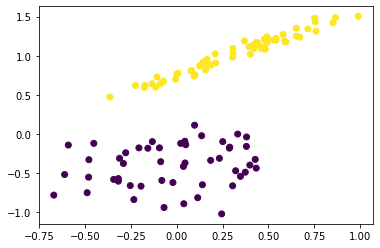

In [ ]:
plt.scatter(X0[:,0],X0[:,1],c=np.concatenate((np.zeros(n1),np.ones(n2))))

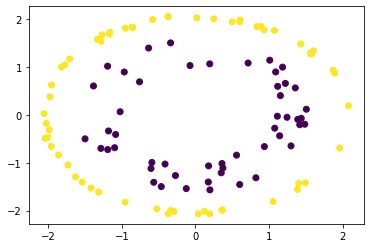

In [ ]:
# The circles dataset
r0 = np.random.random(n1)*0.6+1
theta0 = np.random.random(n1)*2*np.pi
x00 = r0*np.cos(theta0)
x01 = r0*np.sin(theta0)
x0 = np.concatenate((x00.reshape((-1,1)),x01.reshape((-1,1))),axis=1)

r1 = np.random.random(n2)*0.1+2.0
theta1 = np.random.random(n2)*2*np.pi
x10 = r1*np.cos(theta1)
x11 = r1*np.sin(theta1)
x1 = np.concatenate((x10.reshape((-1,1)),x11.reshape((-1,1))),axis=1)

X1 = np.concatenate((x0,x1),axis=0)

plt.scatter(X1[:,0],X1[:,1],c=np.concatenate((np.zeros(n1),np.ones(n2))))


### Clustering as non-convex optimization

Our first take uses a lot of the ingredients we developed for MDS. We operate on the rows of a data matrix $\bX$ and the analysis requires a *metric* $d(\bx_i,\bx_j)$ - as before, the choice is driven by the following considerations:
  + computational convenience (we will go along with this below)
  + chosen to make sense for the application at hand - this is crucial and requires subject-matter knowledge
  
Then, clustering tries to find a local minimum to the following loss function: 

$$L(\bz_1,\ldots\bz_n) = \sum_{k=1}^K \sum_{i} \sum_j z_{ik}z_{jk} d(\bx_i,\bx_j)$$

Can you understand what this loss function is trying to achieve? 

This is a **discrete optimization** (aka **combinatorial optimization**) problem and *in principle* can be solved by complete enumeration. However, this is completely impractical for moderate $n$

Note that as defined above clustering tries to minimize within-cluster distances, but little math shows that this is equivalent to maximizing between-cluster distances. 

Convenience dictates our next step: choose a metric for which we can come up with an algorithm to minimize loss that has reasonable performance and *scales* linearly with $n$, hence can be applied to big data. 

Very much like the *classical scaling* the Euclidean metric turns out to be convenient. One of the main reasons for why it makes life easy is the following property, which follows from *little math*: 

$$\arg \min L(\bz_1,\ldots\bz_n) = \arg \min L(\bz_1,\ldots,\bz_n,\bmu_1,\ldots,\bmu_K)$$ 

where

$$L(\bz_1,\ldots,\bz_n,\bmu_1,\ldots,\bmu_K) =  \sum_{k=1}^K \sum_{i}  z_{ik} \|\bx_i - \bmu_k\|^2$$

We can use *coordinate-wise descent* to find a local minimum:
+ (E-step) Given values for $\bmu_1,\ldots,\bmu_K$ optimize over $\bz_1,\ldots,\bz_n$:
    + This is *distributed* across $i$ and it simply sets $\bz_i$ such that data point $i$ is allocated to component $k$ for which $\|\bx_i -\bmu_k\|$ is smallest
+ (M-step) Given values for $\bz_1,\ldots,\bz_n$ optimize over $\bmu_1,\ldots,\bmu_K$:
    + This is *distributed* across $k$ and simply sets $\bmu_k$ equal to the sample mean of data allocated to the component
  
This combination of metric and optimization algorithm yields what is known as **$K$-means algorithm**, an idea that traces back to Cox 1957

Note: recall the *vector quantization* (VQ) we saw earlier? This is what it is

The algorith *will* converge to a local optimum:
+ Starting values
+ Monitoring convergence
+ Multiple starting 
+ Speed ups
+ Centering the data
+ etc

#### Little experiment: the synthetic datasets

Before we proceed any further lets try out this algorithm on our two datasets - and lets run each a few times!


In [ ]:
from sklearn.cluster import KMeans
res0 =  KMeans(n_clusters=2,algorithm="full",max_iter=30).fit(X0)
res1 =  KMeans(n_clusters=2,algorithm="full",max_iter=30).fit(X1)

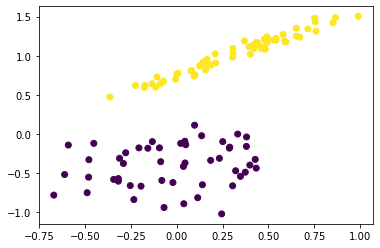

In [ ]:
plt.scatter(X0[:,0],X0[:,1],c=res0.labels_)

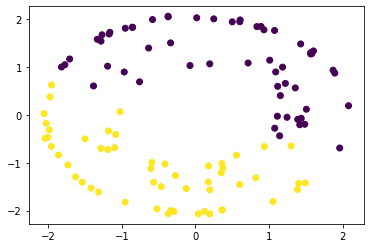

In [ ]:
plt.scatter(X1[:,0],X1[:,1],c=res1.labels_)

We can see the algorithm at work: `KMeans` output in `sklearn` is not that great (e.g. we can not get the sequence of scores) but we could code this up ourselves. Here we are more interested to understand the underlying concept, so refer to some nice figs from Bishop's book: 

<img src="Kmeans.png" width="800">

<img src="Kmeansconv.png" width="800">

#### Data transformations

K-means relies on Euclidean metric (although we already saw that it can work nicely when this is really inappropriate). This metric assumes that all variables contribute equally to distance - and spherical symmetry. 

We can deviate from the former by scaling variables before applying K-means. Lets first try this out in the two examples

In [ ]:
res0 =  KMeans(n_clusters=2,algorithm="full",max_iter=300).fit(scl(X0,with_mean=False))
res1 =  KMeans(n_clusters=2,algorithm="full",max_iter=300).fit(scl(X1,with_mean=False))

In [ ]:
plt.scatter(X0[:,0],X0[:,1],c=res0.labels_)

In [ ]:
plt.scatter(X1[:,0],X1[:,1],c=res1.labels_)

This type of standardization that is a good practice for many Statistical Machine Learning algorithms, is not always a good idea here - we already have an example above - especially when we reduce the imoprtance of a variable that is helpful in clustering. 

The following is an example from Hastie et al. that makes the same point

<img src="../images/scaling_is_bad.png" width="800">


#### Connection to model-based clustering

An alternative approach is to build a statistical model for observed and latent variables. What we describe here is the pPCA analogue to discrete latent variables

The generative model is: we have densities $p_1(\bx),\ldots,p_K(\bx)$, each describes a sub-population. Then 

$$\bx_i | \bz_i \sim p_{k} (\bx_i) \quad if \quad z_{ik}=1$$

and 

$$p(z_{ik} = 1) = \pi_k \quad \pi_k \geq 0 \quad \sum_k \pi_k =1 $$

Then, if we marginalize the latent variable we obtain a **mixture model** for $\bx_i$:

$$p(\bx_i) = \sum_{k} \pi_k p_k(\bx_i)$$

Then: if we take $p_k(\bx) \equiv \Gau(\bmu_k,v\bI)$ K-means becomes an algorithm for computing the maximum likelihood estimate of $\bmu_1,\ldots,\bmu_K$ in this model. 

But the nice aspect of model-based clustering is that we can accommodate different data structures, e.g., this is an illustration from Bishop: 

<img src="../images/EM_Gauss.png" width="800">


### Spectral clustering & graph-based learning

This technique has interesting intersections with a number of ideas we have discussed: at its core is PCA, it uses discrete latent variables, it is based on a metric and distances between the data points, it uses K-means clustering. 

The key idea here is to represent the data as a **graph** and identify "low-d structure" by means of graph connectivity properties. 

This approach has very deep roots in applied mathematics.

Lets look at the two synthetic datasets we have created, patches and circles, to get some intuition about what kind of structure spectral clustering tries to exploit relative to K-means clustering, when they both are based on the same distance measure 

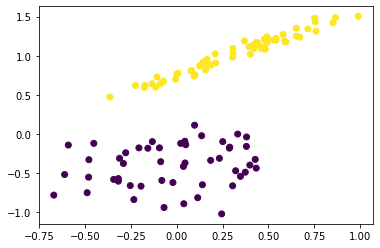

In [ ]:
plt.scatter(X0[:,0],X0[:,1],c=np.concatenate((np.zeros(n1),np.ones(n2))))

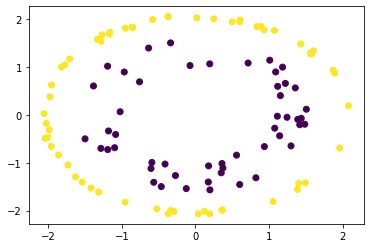

In [ ]:
plt.scatter(X1[:,0],X1[:,1],c=np.concatenate((np.zeros(n1),np.ones(n2))))

#### Some graph connectivity concepts

A graph with $n$ nodes and weight/affinity matrix $\bA$ where $A_{ij} ≥ 0$ is a measure of strength of the edge, and $\bA^T = \bA$; in the simplest
case $A_{ij} ∈ {0, 1}$, for example:

<img src="../images/graph.png" width="400">

In [ ]:
# The affinity matrix for the simple example

A = np.array([[0,1,1,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,],[1,1,0,0,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,1,1],
              [0,0,0,0,0,1,0,1,1],[0,0,0,0,0,1,1,0,1],[0,0,0,0,0,1,1,1,0]])
A

array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0]])

We can identify connected components in the graph by doing a PCA on the **graph Laplacian**: 

$$\bB = diag(B_1,\ldots,B_n) \quad B_i = \sum_j A_{ij} \quad \bL = \bB- \bA$$

$\bL$ is called the graph Laplacian (and there are various other versions of this) 
+ $\bL$ is positive semi-definite
+ it has a 0 eigenvalue for for each *disconnected* component
+ the corresponding eigenvectors to a 0 eigenvalue are linear combinations of component-indicator functions

In [ ]:
L = np.diag(np.diag(np.matmul(A,np.ones((9,9))))) - A
U, B, Ut = np.linalg.svd(L, full_matrices=True)
np.round(B,4)

array([4., 4., 4., 3., 3., 2., 0., 0., 0.])

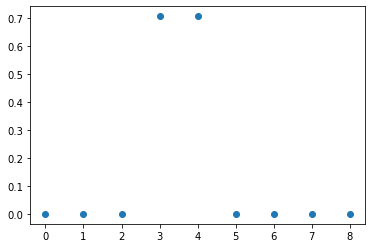

In [ ]:
# look at eigenvectors: 
plt.plot(U[:,-2],"o")

#### Spectral clustering: the algorithm

+ Embed data points in a graph: 
  + Use a metric $d(\bx_i,\bx_j)$ and use it to build an **affinity kernel**, e.g., $A_{ij} = exp\{-d(\bx_i,\bx_j)^2/v\}$
  + SV-decompose $L$; look for $K$ smallest singular values
  + run a clustering algorithm (e.g. K-means) in K -dimensions to cluster the values of the K eigenvectors into K groups

#### Exercise
Using the Euclidean metric, and experimenting with different values of the scale parameter v, code a spectral clustering algorithm with K=2 for the patches dataset.
Plot the final classification results using spectral clustering.

In [ ]:
# Your code here

# Step 1: write a function to compute exp(-|x|^2/v) or given 
# vector x, use also as argument the scale v. Call the function 
# kernel


# Step 2: create a function that from a matrix nxp X returns a 
# nxn matrix A of affinities, use also as argument the scale v.
# Call this affinity



# Step 3: create a function that takes an affinity matrix and
# returns the graph Laplacian, the K smallest singular values and
# the K corresponding singular vectors, where K is an argument of 
# the function. Call this graphspectral


# Step 4: create a wrapper that takes as input a data matrix X, 
# a number of groups K, and a scale v, and returns a vector of 
# labels from 1 to K, one for each row of the data matrix. Call 
# function spectralcluster. Ideally make an argument the number of
# iterations of Kmeans with a sensible default


# Step 5: run spectral clustering on patches with K=2 and plot 
# results; experiment with different values of the scale

## Some hints for the practitioner

+ SVD/PCA is a useful tool (at least the starting point) for embedding high-dimensional data on lower dimensional spaces. This can be used for dimension reduction, in which case SVD achieves optimal performance in terms of explained variance, for data visualization (in which case the latent dimension is 2 or 3), for understanding the different sources of variation in the data and their relative imprortance. It can also be used as a feature extraction tool for further downstream analysis
+ Multidimensional scaling and its variants is a useful data visualization technique for embedding high-d data in low-d spaces so that proximity in the latent space is interpreted as proximity in the original space. It is also very useful analysis tool when the data are only given in terms of comparisons, as for example in marketing studies. Classical scaling is based on basic SVD
+ Exciting applications, interpretations and extensions of PCA are available when the matrix factorization point of view is taken. This allows to embed on a common space both the rows (e.g. similarity among customers) and the columns (e.g. similarity among products) of the data matrix. 
+ Grouping data is effectively an association of the rows in a data matrix with discrete latent variables. This (can) involve distance matrices, and their choice is critical to capture important qualitative and quantitative differences. K-means is an algorithm to optimize a loss function built around the Euclidean distance. More interesting distances will be associated to difficult optimization problems. Probabilistic unsupervised learning can be very interesting in these cases.
+ Graph-based methods use graph-distances to capture the distance between rows in the data matrix. Spectral clustering, which computationally is also based on SVD, is a powerful such method

## References

Hastie, T., Tibshirani, R., Friedman, J., 2009. *Elements of Statistical Learning*. 2nd Edition. Chapter 14

Bishop, C.M., 2006 *Pattern recognition and machine learning*. Chapters 9 and 12 

Cox, D.R. (1957) Note on grouping.J. Amer. Statist. Assoc. 52, 543-547.

Tibshinari, R., Walther, G., Hastie, T., 2001. *Estimating the number of clusters in a data set via gap statistic*. J.R. Statis.Soc. B (2001) 63, part2: 411-423. https://web.stanford.edu/~hastie/Papers/gap.pdf